# Estimating Beta for META

## Goal 
The objective of this part is to estimate beta for META (Facebook) stock.

## Model 
Beta is a parameter of a CAPM model that measures a sensativity of stock returns to changes in market risk premiums. The CAPM model has a form

\begin{equation}

R_{stock} = R_f + \beta(R_{market} - R_f) + \epsilon,

\end{equation}

where $R_{stock}$, $R_f$, $R_{market}$ are stock returns, risk-free rate, market portfolio returns respectively, and $\epsilon \sim N(0,1)$. We can use linear regression to estimate the parameters.

## Model Assumptions

On top of the standard assumption of the Linear Regression model we should ass the assumptions specific for the CAPM. The assumptions of both frameworks are strong and in many case unrealistic. The list of all of them is given below.

### OLS Regression Assumptions

1. The relationship between the dependent and independent variables is linear;
2. Full Rank, i.e. there is no multicollinearity between the independent variables; 
3. Exogeneity of the independent variables: $E[\epsilon_i | x_{j1}, x_{xj2},...,x{jk}]=0$;
4. There is no correlation between independent variables and the residuals;
5. Homoscedasticity and nonautocorrelation of the residuals;
6. Residuals are normally distributed; 

### CAPM Assumptions
1. Investors are risk-averse;
2. Every investor maximizes a utility of his terminal wealth;
3. Investors make their investment decisions on the risk-return basis;
4. All investors has the same expectations about risk and return;
5. All investor use identical time horizon for their investments, in other words, everyone sells its assets at the same time.
6. Everyone has a free access to the available information;
7. There is a risk-free asset and there is no restricion on borrowing and lending; 
8. There are no taxes or lending cost; 
9. All assests are marketable and divisable; 

## Specification
Location:
* The US Market;

Time Horizon:
* 10 years (2012-12-21, 2022-12-20);

Price Frequency:
* Daily;

Returns:
* Arithmetic;

The proxies:
* **Equity Index** represented by S&P 500 Total Return Index;
* **Bond Index** represented by the total returns on S&P U.S. Treasury Bond Index;

## Data Sources
* https://finance.yahoo.com/
* https://www.spglobal.com/spdji/en/indices/fixed-income/sp-us-treasury-bond-index/#overview

## Results

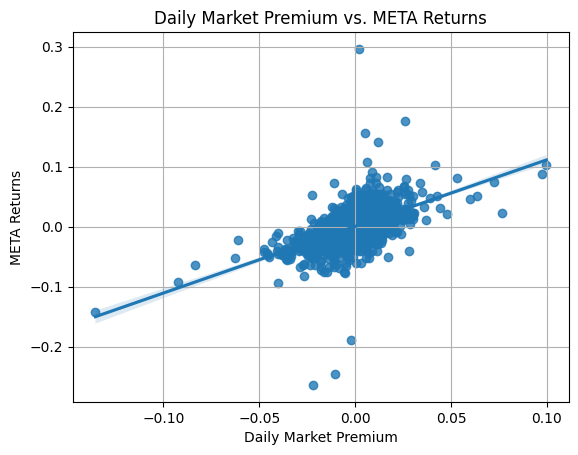

Correlation Matrix:
                    Bond Index  Equity Index      META  DailyMarketPremium
Bond Index            1.000000     -0.255346 -0.091253           -0.434204
Equity Index         -0.255346      1.000000  0.570911            0.981825
META                 -0.091253      0.570911  1.000000            0.549831
DailyMarketPremium   -0.434204      0.981825  0.549831            1.000000


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm

#loading returns data
returns = pd.read_csv('data/linear_regression_data.csv', index_col=0)

#additional calculations
returns['DailyMarketPremium'] = returns['Equity Index'] - returns['Bond Index']

#plotting scatter plot with a regression line
sns.regplot(x='DailyMarketPremium', y='META', data=returns) 
plt.grid()
plt.xlabel('Daily Market Premium')
plt.ylabel('META Returns')
plt.title('Daily Market Premium vs. META Returns')
plt.show()

#estimating correlation matrix
print('Correlation Matrix:')
print(returns.corr())

In [2]:
#building OLS regression model
x = sm.add_constant(returns['DailyMarketPremium'])
y = (returns['META'] - returns['Bond Index']).to_numpy()
model = sm.OLS(y, x)
fitted_model = model.fit()

#displaying results
print(fitted_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     1293.
Date:                Tue, 02 May 2023   Prob (F-statistic):          1.38e-228
Time:                        23:32:02   Log-Likelihood:                 6253.2
No. Observations:                2499   AIC:                        -1.250e+04
Df Residuals:                    2497   BIC:                        -1.249e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0003      0

## Discussion 

* A good starting point in OLS analysis is to have a look at the correlation matrices. The matrix may give a hint not only of which variables to include in the model, but also that may uncover multicollinearity. In our case, we are going to fit a simple linear regression, so multicollinearity would not be a problem. However, the matrix shows that the bond market is negatively correlated with the equity market, thus it is a good idea to include both instruments in your portfolio, as it will reduce the volatility (riskiness) of the portfolio. The last observation, that can be made is that market risk premium is negatively correlated with the bond market, even more than the bond market with the equity market. Thus, when interest rates rise we should observe a fall in bond prices, and on average, a slight increase in equity prices. This contradicts a popular assumption, that when the rates go up the equities should necessarily go down. Further investigation should be conducted, as the past decade was marked by the prolonged period of low interest rates, and a fear of deflation and stagnation of economic growth, thus markets welcomed any slight increase in rates. 

* The scatter plot with the regression line is helpful when we need to check if two variables are linearly dependent. In our case, we see they are not. However, this does not mean that the regression is completely obsolete. It only means that we cannot rely on the model's forecasts. In such a case, it is better to use the model analytically.

* Let us have a look at the summary of our OLS regression model. Notice, that we substracted risk-free rate from the dependent variable -- META stock returns. This method yields an additional metric named Jenson's alpha. In our case, it is equal to zero, either with subtraction or without. The beta is statistically significant with p value being less than 0 and a low standard error. On the right side, we see an R-squared of 0.341, thus the model is able to explain 34.1% of the variation in the dependent variable (META). The adjusted R-squared, F-statistic, Log-likelihood and AIC, BIC are not very helpful while fitting a simple regression. Under the parameters section, we see some additional statistical tests of the residuals. The omnibus test is designed to check if the distribution of the residuals is normal, the p-value is 0 so there is no doubt it is not. This violates one of the model's assumptions. Thus, it confirms once again that the model is not good for the job. The Durbin-Watson test is performed to test autocorrelation in residuals. If the value is within 1-2 then the process is not autocorrelated. Thus, the residuals are not autocorrelated. JB test is an alternative to Omnibus, it checks the normality of a distribution. As we see, it confirms our previous results. The conditional number works somewhat like a derivative of the function, it measures its sensitivity. The lower the value the better. In our case, the function is very sensitive, hence unreliable. 

## Conclusion 

Obviously, the classical CAPM model is not a good tool for forecasting, but still may convey some analytical information about the studied processes. However, given the non-linear nature of the stock returns, one should consider other ways to calculate the required rate of return. 

## 